In [23]:
import qiskit
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
# provider = IBMQ.load_account()

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')



ibmqfactory.load_account:WARNING:2021-04-11 18:56:41,953: Credentials are already in use. The existing account in the session will be replaced.


In [24]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
# from qiskit.providers.ibmq import least_busy
from qiskit.providers.ibmq import *
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [25]:
n = 7 # number of qubits used to represent s

In [26]:
def wordToBV(s) :
    #convert text to binary
    a_byte_array = bytearray(s, "utf8")
    byte_list = []


    for byte in a_byte_array:
        binary_representation = bin(byte)
        byte_list.append(binary_representation[9-n:])
        #chop off the "0b" at the beginning. can also truncate the binary to fit on a device with N qubits
        #binary has 2 extra digits for "0b", so it starts at 9 for our 7 bit operation. 

    print(byte_list)
    
    circuit_array = []
    
    length = len(byte_list) 
    
    for i in range(length):
    
        s = byte_list[i]


        #do all  this stuff for every letter

        # We need a circuit with n qubits, plus one ancilla qubit
        # Also need n classical bits to write the output to
        bv_circuit = QuantumCircuit(n+1, n)

        # put ancilla in state |->
        bv_circuit.h(n)
        bv_circuit.z(n)

        # Apply Hadamard gates before querying the oracle
        for i in range(n):
            bv_circuit.h(i)

        # Apply barrier 
        bv_circuit.barrier()

        # Apply the inner-product oracle
        s = s[::-1] # reverse s to fit qiskit's qubit ordering
        for q in range(n):
            if s[q] == '0':
                bv_circuit.i(q)
            else:
                bv_circuit.cx(q, n)

        # Apply barrier 
        bv_circuit.barrier()

        #Apply Hadamard gates after querying the oracle
        for i in range(n):
            bv_circuit.h(i)

        # Measurement
        for i in range(n):
            bv_circuit.measure(i, i)
            
        circuit_array.append(bv_circuit)

    
    return circuit_array

In [27]:
circuit_to_run = wordToBV('Melbourne')

['1001101', '1100101', '1101100', '1100010', '1101111', '1110101', '1110010', '1101110', '1100101']


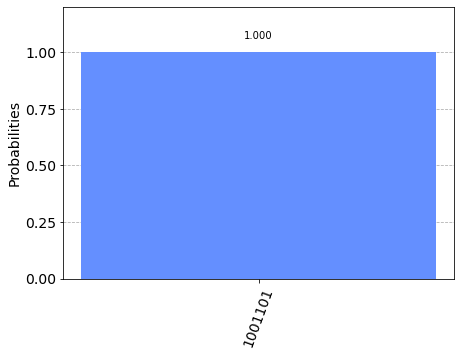

In [28]:
#run the first letter on a simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 4096
results = execute(circuit_to_run[0], backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [ ]:
#run on real hardware. 

IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q', 'open', 'main')

#choose any device 8 qubits or more
# device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 8 and 
#                                   not x.configuration().simulator and x.status().operational==True))
    
# print("Running on current least busy device: ", device)

# or, specifically choose a device. Paris performs the best out of any device so far
device = provider.get_backend('ibmq_16_melbourne')
print("hardcoded to run on ", device)


# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
job = execute(circuit_to_run, backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)

# Get the results from the computation
results = job.result()
answer = results.get_counts(circuit_to_run)
plot_histogram(answer)